<a href="https://colab.research.google.com/github/joshuadollison/MAT421/blob/main/MAT421_16133_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework 2**
Joshua Dollison

MAT421-16133

1/26/2025


In [1]:
#ex 17.1
import numpy as np
import matplotlib.pyplot as plt

#ex 17.2
from scipy.interpolate import interp1d

#ex 17.3
from scipy.interpolate import CubicSpline

# **17.1: Interpolation Problem Statement**

The course textbook explains a situation in which we, the reader, would like to find an estimation function $\widehat{y}(x)$ such that $\widehat{y}(x_i) = y_i$
for every point in our dataset. This means the estimation function goes through our data points. Given a new $x*$, we can **interpolate** its function value using $\widehat{y}(x*)$. In this context, $\widehat{y}$ is called an **interpolation** function.

Put more succinctly, interpolation estimates values between known data points. This example visualizes how data points are connected, and intermediate values are interpolated.

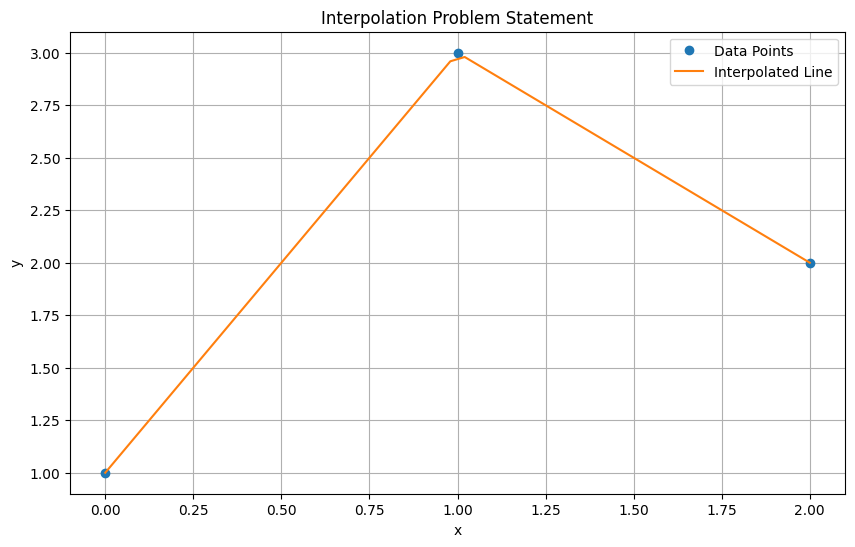

In [2]:
# Known data points
x = np.array([0, 1, 2])
y = np.array([1, 3, 2])

# Linear interpolation between points
x_new = np.linspace(0, 2, 50)
y_new = np.interp(x_new, x, y)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Interpolated Line')
plt.title('Interpolation Problem Statement')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


A real-world application example might include the interpolation of temperature observations taken over time.  In the example below we see the trend of several temperature measurements, taken every six hours.

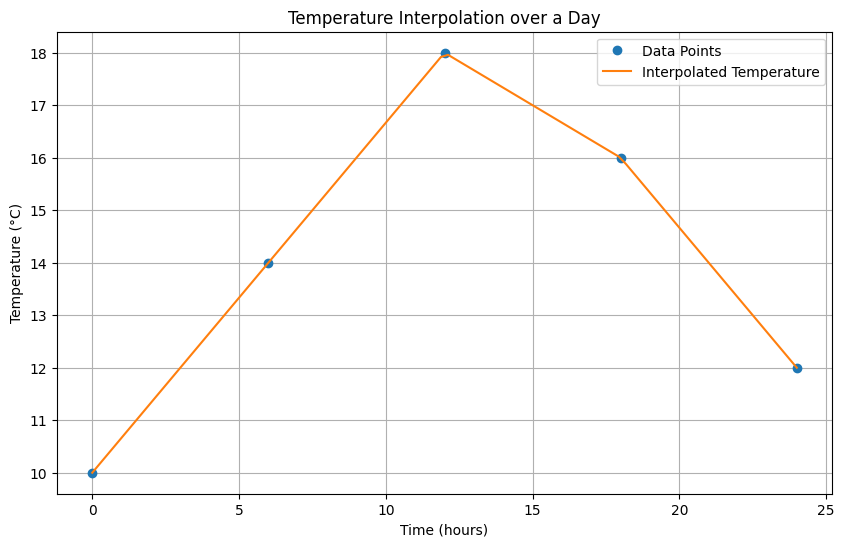

In [3]:
# Time (hours) and Temperature (Celsius)
time = np.array([0, 6, 12, 18, 24])
temperature = np.array([10, 14, 18, 16, 12])

# Interpolation
time_new = np.linspace(0, 24, 100)
temp_new = np.interp(time_new, time, temperature)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(time, temperature, 'o', label='Data Points')
plt.plot(time_new, temp_new, '-', label='Interpolated Temperature')
plt.title('Temperature Interpolation over a Day')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()

# **17.2: Linear Interpolation**

As the name implies, **linear interpolation** estimates values along a straight line between two nearest data points. This method is efficient for a small dataset.

The course text states that, in linear interpolation, the estimated point is assumed to lie on the line joining the nearest points to the left and
right. Assume, without loss of generality, that the $x$-data points are in ascending order; that is, $x_i < x_{i + 1}$, and let $x$ be a point such that $x_i < x < x_{i + 1}$. Then the linear interpolation at $x$ is $\widehat{y}(x) = \frac{(y_{i+1}-y_{i})(x-x_i)}{(x{i+1}-x_i)}$.

In the example below, I use the interp1d function from scipy to estimate several $\widehat{y}$ values using linear interpolation.  The path between known values is represented as a line chart with the estimated values drawn on top.

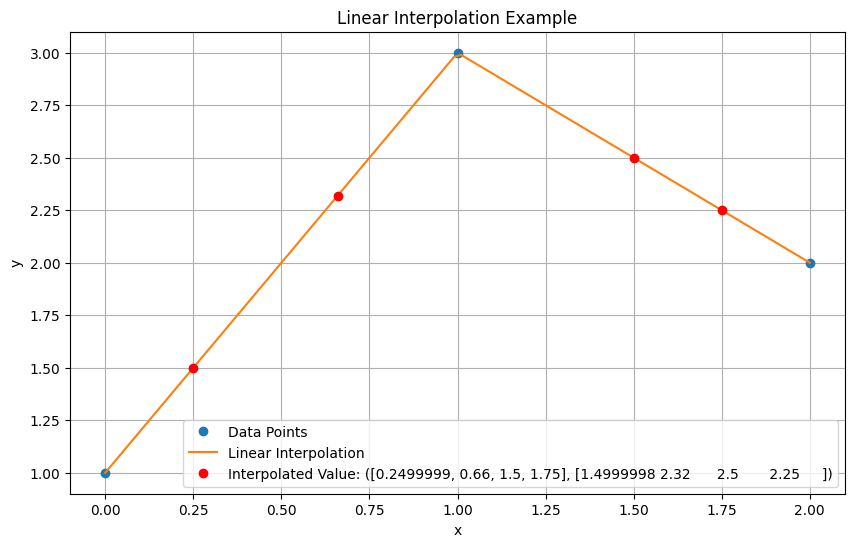

In [4]:
# Data points
x = [0, 1, 2]
y = [1, 3, 2]

# Linear interpolation
linear_interp = interp1d(x, y, kind='linear')

# Interpolated value at x = 1.5
x_query = [0.2499999, 0.66, 1.5, 1.75]
y_query = linear_interp(x_query)

# Visualization
x_new = np.linspace(0, 2, 100)
y_new = linear_interp(x_new)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Linear Interpolation')
plt.plot(x_query, y_query, 'ro', label=f'Interpolated Value: ({x_query}, {y_query})')
plt.title('Linear Interpolation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


A real-world application example might include the interpolation of stock price observations taken at different intervals of time throughout the day.  In the example below we see the trend of price quotes, taken at 3 hour intervals.  We can see that even though we don't have the direct observation of the price at 14:00, we can use linear interpolation to estimate it.

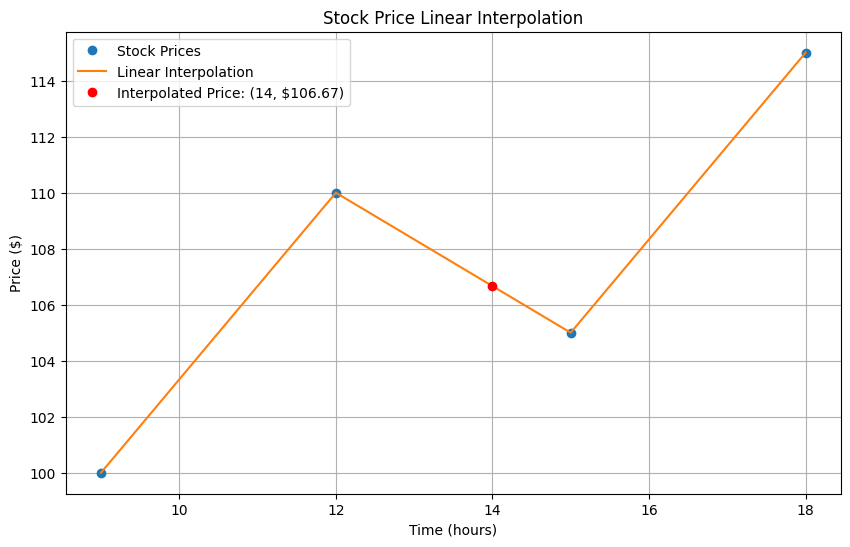

In [5]:
# Time (hours) and stock prices ($)
time = [9, 12, 15, 18]
prices = [100, 110, 105, 115]

# Linear interpolation
linear_interp = interp1d(time, prices, kind='linear')

# Query stock price at 14:00
query_time = 14
query_price = linear_interp(query_time)

# Visualization
time_new = np.linspace(9, 18, 100)
price_new = linear_interp(time_new)

plt.figure(figsize=(10, 6))
plt.plot(time, prices, 'o', label='Stock Prices')
plt.plot(time_new, price_new, '-', label='Linear Interpolation')
plt.plot(query_time, query_price, 'ro', label=f'Interpolated Price: ({query_time}, ${query_price:.2f})')
plt.title('Stock Price Linear Interpolation')
plt.xlabel('Time (hours)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid()
plt.show()

## **17.3: Cubic Spline Interpolation**

Cubic spline interpolation constructs a smooth curve passing through all data points by using piecewise cubic polynomials.  According to the course text, if we assume that the points $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$ are joined by a cubic polynomial $S_i(x) = a_ix^3 + b_ix^2 + c_ix + d_i$ that is valid for $x_i \le x \le x_{i+1}$. Then to fnd the interpolating function, we must first determine the coefficients $a_i, b_i, c_i, d_i$ for each of the cubic functions.



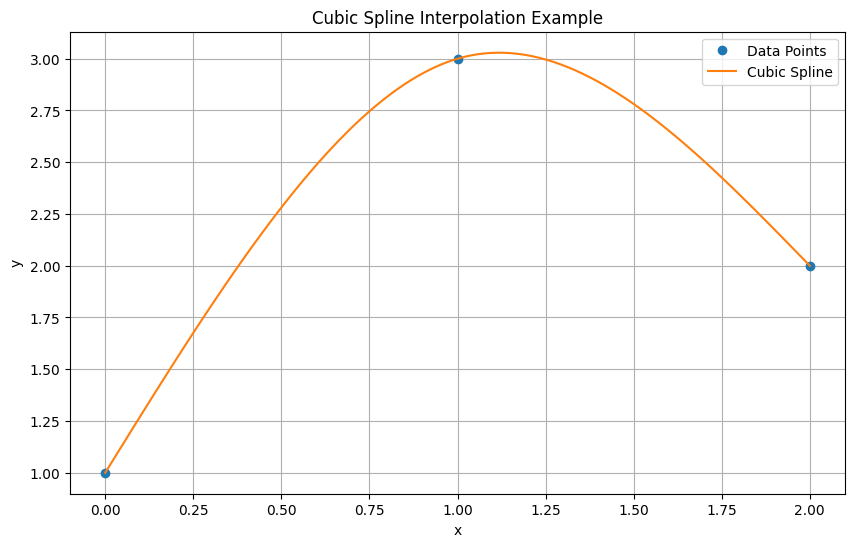

In [6]:
# Data points
x = [0, 1, 2]
y = [1, 3, 2]

# Cubic spline interpolation
cubic_spline = CubicSpline(x, y, bc_type='natural')

# New x values for smoother curve
x_new = np.linspace(0, 2, 100)
y_new = cubic_spline(x_new)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Data Points')
plt.plot(x_new, y_new, '-', label='Cubic Spline')
plt.title('Cubic Spline Interpolation Example')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


A real-world application example might include the observation of daily rainfall amounts occurring in a specific location over the course of several days.  In the example below we apply cubic spline interpolation.  The class text describes an application of this type of interpolation to the motion of a vehicle in order to more naturally depict the fact that automobiles don't typically accelerate in a linear fashion.  Similarly, the accumulation rate of rainfall would not be linear - sometimes raining harder thoughout the day than others.  Or perhaps we wish to apply some sort of calculus to our fit and require a more continuous representation.

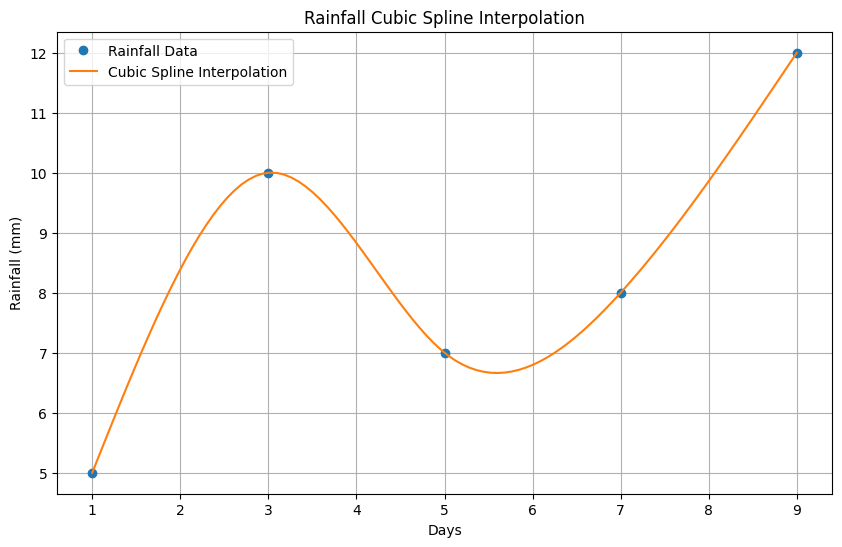

In [7]:
# Days and Rainfall (mm)
days = [1, 3, 5, 7, 9]
rainfall = [5, 10, 7, 8, 12]

# Cubic spline interpolation
cubic_spline = CubicSpline(days, rainfall, bc_type='natural')

# New days for interpolation
days_new = np.linspace(1, 9, 100)
rainfall_new = cubic_spline(days_new)

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(days, rainfall, 'o', label='Rainfall Data')
plt.plot(days_new, rainfall_new, '-', label='Cubic Spline Interpolation')
plt.title('Rainfall Cubic Spline Interpolation')
plt.xlabel('Days')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid()
plt.show()